In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv("./data/schema.csv")
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


- data의 상위5개 하위5개를 확인, 데이터의 shape를 확인 290개의 row와 3개의 col 의형태

<h3> 객관식 문항에 대한 설문조사결과 확인.

In [ ]:
mcq = pd.read_csv("./data/multipleChoiceResponses.csv",encoding="ISO-8859-1")

In [7]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [8]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

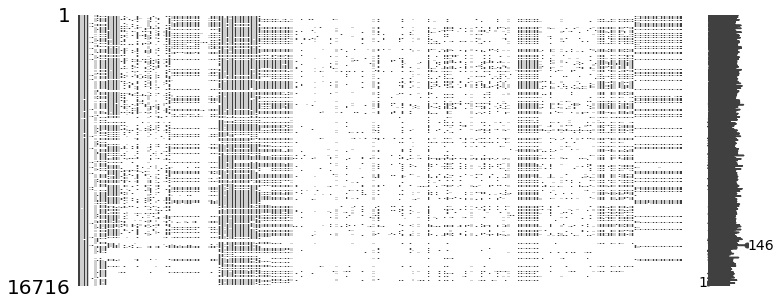

In [9]:
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

- 16716 명의 데이터와 228개의 선다형 객관식 문제와 62개의 주관식 문제에 대한 응답이다.

- 비어있는 데이터들이 많은것을 확인할 수 있다.

<h3> 설문통계

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

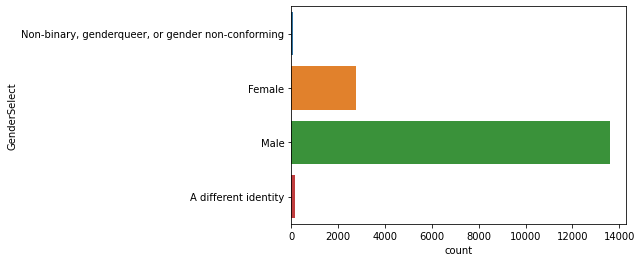

In [10]:
sns.countplot(y="GenderSelect", data=mcq)

- 여성보다 남성의 비율이 높음을 확인할 수 있다.

In [19]:
# 국가별 응답수

con_df = pd.DataFrame(mcq['Country'].value_counts())

# Countty 컬럼을 인덱스로 지정.
con_df['국가'] = con_df.index

# 컬럼의 순서대로 응답수, 국가로 컬렴명을 지정해 줌.

con_df.columns = ['응답수','국가']

# index 컬럼을 삭제하고 순위를 알기위해 reset_index() 를 해준다.
# axis = 1 은 열을 삭제한다는 의미. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [20]:
# age에 대한 기초통계량 확인하는 방법.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

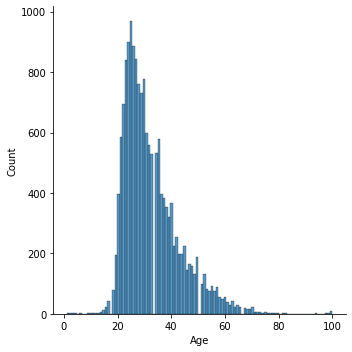

In [22]:
sns.displot(mcq[mcq['Age']>0]['Age'])

- 응답자 대부분이 젊은 나이대이다.

- 나이가 20대부터 급격히 늘어나며 30대가 가장 많다. 평균나이는 위에서 확인한 것과 같이 32세이다.

<h3> 학력을 기준으로 통계

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

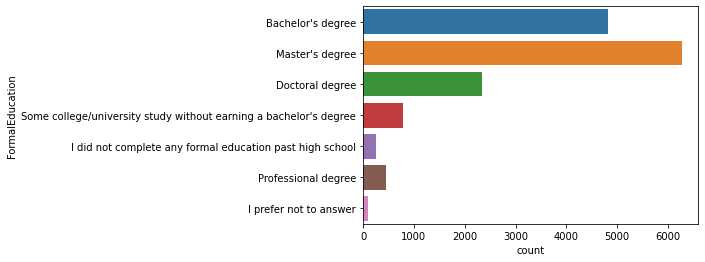

In [23]:
sns.countplot(y='FormalEducation',data=mcq)

- 학사 학위를 가진 사람보다, 석사 학위를 가진 사람이 많으며, 박사 학위를 가지고 있는 사람들도 많은것을 확인할 수 있다.

In [24]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


- 주전공으론 CS가 가장많으며 수학과, 엔지니어링 순으로 많은것을 확인할 수 있다.

In [25]:
# value_counts 를 사용하여 그룹화된 데이터의 카운트값을 확인할 수 있다.
# normalize=True 옵션을 사용할 시 해당 데이터가 전체 데이터에서 어느정도 비율을 차지하는 지 알 수 있다.

mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True,right_index=True)
mcq_major_df.columns = ['응답수','비율']
mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


- 컴퓨터 전공자의 비율이 약 33퍼센트로 가장 높으며, 수학,엔니지어링, 전기공학 순이다.

<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

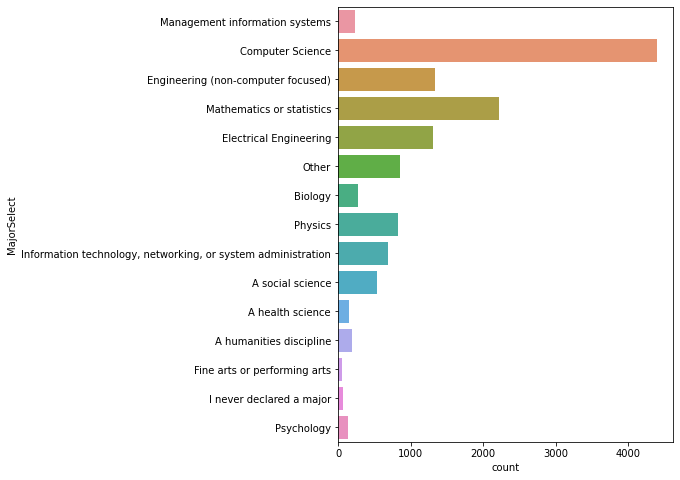

In [30]:
# 재학중인 사람의 전공 현황.
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data = mcq)

- 재학생의 전공도 컴퓨터공학 , 수학, 엔지니어링, 전기공학 순이다.

<h3> 취업여부에 따른 통계현황

In [31]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

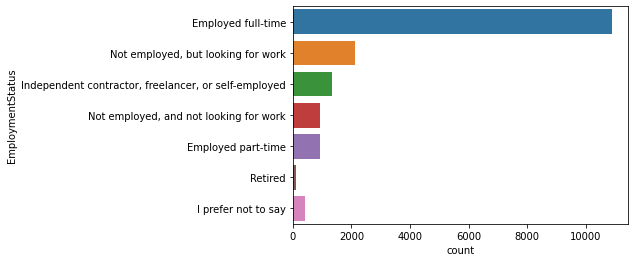

In [32]:
sns.countplot(y='EmploymentStatus', data=mcq)

- 응답자의 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12% 이다.

<h3> 프로그래밍 경험

<AxesSubplot:xlabel='count', ylabel='Tenure'>

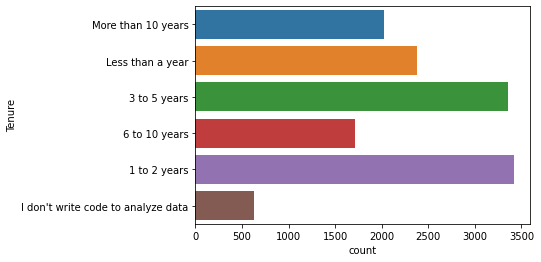

In [33]:
sns.countplot(y='Tenure', data = mcq)

- Tenure 는 프로그래밍 경험에 대한 설문이다.
- 설문결과 5년미만이 가장 많았으며 1~2년이 가장 많은 것을 확인할 수 있다.

The number of interviewees in Korea: 194


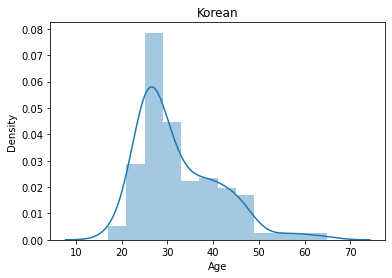

In [34]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [35]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

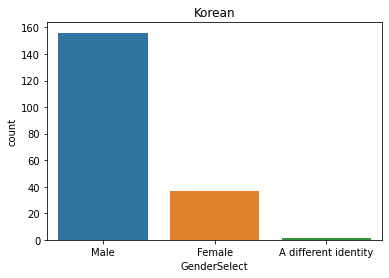

In [36]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

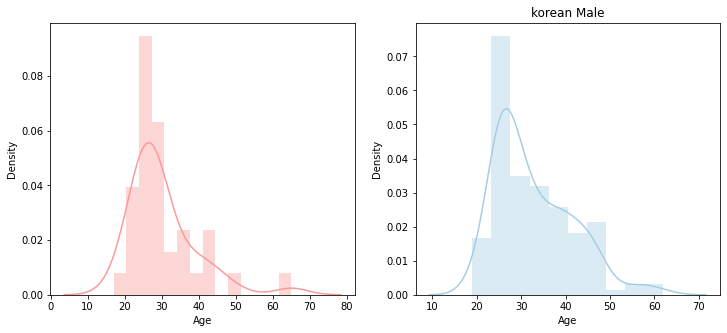

In [37]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

- 한국의 경우 성별의 비율이 남성이 훨씬 많았으며, 2~30대에 가장 많다.
- 하지만 응답자의 수가 194명으로 많은수가 아니기 때문에 일반화하긴 어렵다.

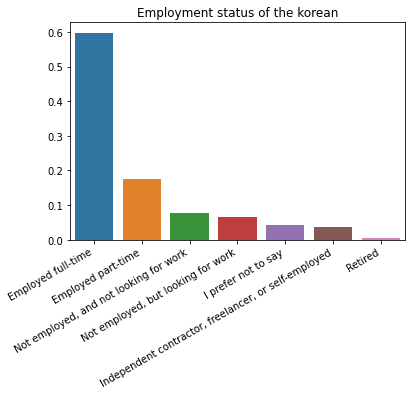

In [38]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

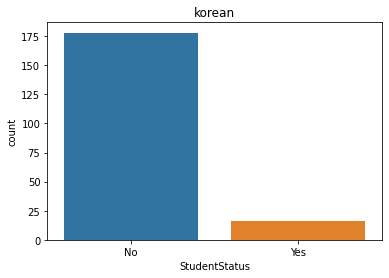

In [39]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()